In [28]:
# Market Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 100)

In [29]:
cust = pd.read_csv(r"customer_data.csv")
internet = pd.read_csv(r"internet_data.csv")
churn = pd.read_csv(r"churn_data.csv")

In [30]:
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [31]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [32]:
a = pd.merge(cust, internet, on  = "customerID", how = 'inner')
final = pd.merge(a, churn, on = "customerID", how = 'inner')
final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
# Missing value imputation
final['TotalCharges'] = final['TotalCharges'].fillna(final['TotalCharges'].median())

TypeError: 

In [8]:
final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Analysis- 2.1
final.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [10]:
# Analysis- 2.2
final.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [11]:
# Analysis- 2.3
final[final['Churn'] =='No'].groupby('gender')['MonthlyCharges'].mean()

gender
Female    61.664908
Male      60.876914
Name: MonthlyCharges, dtype: float64

In [12]:
# Analysis- 2.4
final[final['Churn'] =='No']['InternetService'].value_counts(normalize = True)*100

DSL            37.920371
Fiber optic    34.770004
No             27.309625
Name: InternetService, dtype: float64

<AxesSubplot:>

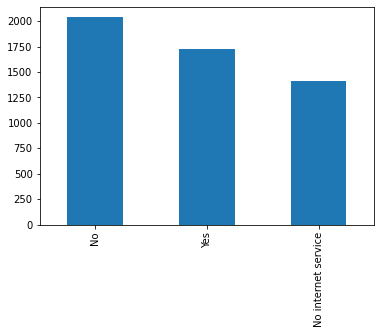

In [16]:
# Analysis- 2.5
#1 OnlineSecurity

final[final['Churn']=='No']['OnlineSecurity'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

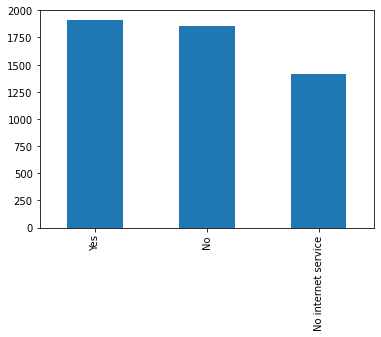

In [17]:
# Analysis- 2.5
#2 OnlineBackup

final[final['Churn']=='No']['OnlineBackup'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

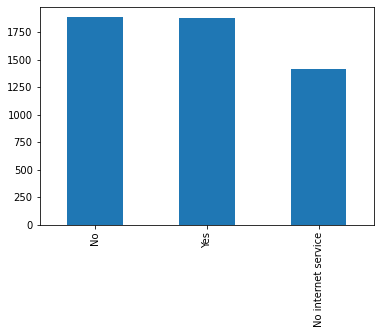

In [18]:
# Analysis- 2.5
#3 Deviceprotection

final[final['Churn']=='No']['DeviceProtection'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

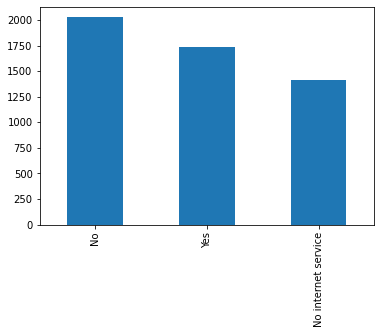

In [19]:
# Analysis- 2.5
#4 Techsupport

final[final['Churn']=='No']['TechSupport'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

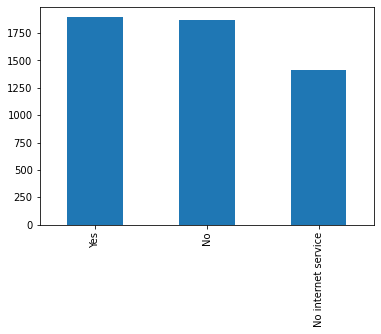

In [20]:
# Analysis- 2.5
#5 StreamingTV

final[final['Churn']=='No']['StreamingTV'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

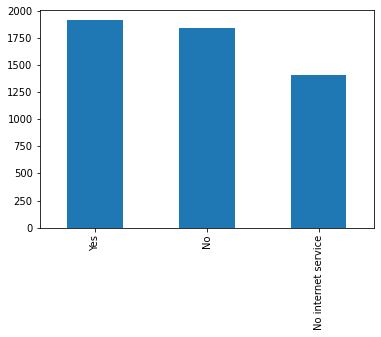

In [21]:
# Analysis- 2.5
#6 StreamingMovies

final[final['Churn']=='No']['StreamingMovies'].value_counts().plot(kind = 'bar')

In [22]:
# Analysis- 2.6

final.groupby(['PaymentMethod']).mean()

,SeniorCitizen,tenure,MonthlyCharges
PaymentMethod,,,
Bank transfer (automatic),0.150907,43.656736,67.192649
Credit card (automatic),0.145204,43.269382,66.512385
Electronic check,0.251163,25.174630,76.255814
Mailed check,0.058313,21.830025,43.917060


In [23]:
# Analysis- 2.7
final[final['Churn']=='No'].groupby('Partner')['MonthlyCharges'].mean()

Partner
No     57.271856
Yes    64.831742
Name: MonthlyCharges, dtype: float64

<AxesSubplot:>

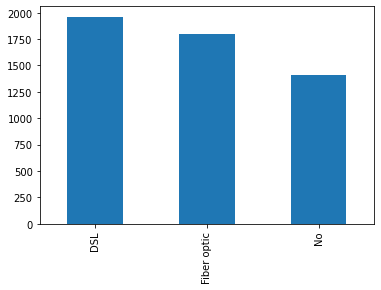

In [24]:
# Analysis- 2.8
final[final['Churn']=='No']['InternetService'].value_counts().plot(kind = 'bar')

In [25]:
# Analysis- 2.9
# Top 10 Customers
final[final['Churn']=='No'].sort_values(by = 'TotalCharges' , ascending = False)['customerID'][:10]

2845    9093-FPDLG
3353    4536-PLEQY
5598    6051-PTVNS
6646    8249-THVEC
1935    7297-DVYGA
348     6243-OZGFH
2715    0484-JPBRU
5842    2971-SGAFL
6994    0804-YGEQV
3949    4495-LHSSK
Name: customerID, dtype: object

In [26]:
# Analysis- 2.9
# Bottom 10 Customers
final[final['Churn']=='No'].sort_values(by = 'TotalCharges' , ascending = True)['customerID'][:10]

6754    2775-SEFEE
753     3115-CZMZD
4380    2520-SGTTA
5218    2923-ARZLG
1082    4367-NUYAO
1340    1371-DWPAZ
488     4472-LVYGI
936     5709-LVOEQ
3331    7644-OMVMY
3826    3213-VVOLG
Name: customerID, dtype: object